In [27]:
from Bio import SeqIO
import pandas as pd
import os
import numpy as np
import ast
import collections
import altair as alt

In [38]:
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [39]:
input_file='/home/mark/Desktop/HLA/DRB/DR_Haplotype_Segments/alignments/DR8_Sequences.afa'
fasta_sequences = SeqIO.parse(open(input_file),'fasta')
sequences=[]
for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    tempList=[name]
    for nucleotide in [str(x).upper() for x in str(sequence)]:
        tempList.append(nucleotide)
    sequences.append(tempList)
df =pd.DataFrame(data=sequences).set_index(0)
consensus=[]
for column in df.columns:
    tempDict= collections.Counter(df[column])
    consensus.append(max(tempDict, key=tempDict.get))
df.loc['Consensus']=consensus

In [40]:
df2 = df.copy()

In [57]:
for column in df.columns:
    
    if len(set(df[column]))==1:
        for row in df.index:
            if row =='Consensus':
                continue
            else:
                df2.at[row,column]=0
    else:
        consensusNucleotide = str(df.at['Consensus',column])
        
        for row in df.index:
            if row == 'Consensus':
                continue
            else:
                if str(df.at[row,column]) == consensusNucleotide:
                    df2.at[row,column]=0
                else:
                    if df.at[row,column] != '-':
                        df2.at[row,column]=1
                    else:
                        df2.at[row,column]=0
mutations=[]
for column in df2.columns:
    for row in df2.index:
        if row !='Consensus':
            mutations.append([column, int(df2.at[row,column]), row])
        else:
            continue
mutationDF2 = pd.DataFrame(data=mutations, columns=['Position','Mutations','Haplotype'])

In [100]:
windowValue=1000
haplotypeDict={row:{y:0 for y in list(split(range(len(df2.columns)), windowValue))} for row in df2.index if row !='Consensus'}

In [101]:
haplotypeDict

{'NA18989.hap1:4392518-4499279': {range(0, 109): 0,
  range(109, 218): 0,
  range(218, 327): 0,
  range(327, 436): 0,
  range(436, 545): 0,
  range(545, 654): 0,
  range(654, 763): 0,
  range(763, 872): 0,
  range(872, 981): 0,
  range(981, 1090): 0,
  range(1090, 1199): 0,
  range(1199, 1308): 0,
  range(1308, 1417): 0,
  range(1417, 1526): 0,
  range(1526, 1635): 0,
  range(1635, 1744): 0,
  range(1744, 1853): 0,
  range(1853, 1962): 0,
  range(1962, 2071): 0,
  range(2071, 2180): 0,
  range(2180, 2289): 0,
  range(2289, 2398): 0,
  range(2398, 2507): 0,
  range(2507, 2616): 0,
  range(2616, 2725): 0,
  range(2725, 2834): 0,
  range(2834, 2943): 0,
  range(2943, 3052): 0,
  range(3052, 3161): 0,
  range(3161, 3270): 0,
  range(3270, 3379): 0,
  range(3379, 3488): 0,
  range(3488, 3597): 0,
  range(3597, 3706): 0,
  range(3706, 3815): 0,
  range(3815, 3924): 0,
  range(3924, 4033): 0,
  range(4033, 4142): 0,
  range(4142, 4251): 0,
  range(4251, 4360): 0,
  range(4360, 4469): 0,
  ran

In [102]:
for haplotype in haplotypeDict.keys():
    mutationDF3 = mutationDF2[mutationDF2['Haplotype']==haplotype].copy()
    for rangeList in haplotypeDict[haplotype]:
        haplotypeDict[haplotype][rangeList]=sum(mutationDF3[mutationDF3['Position'].isin(rangeList)]['Mutations'])

In [103]:
haplotypeDict

{'NA18989.hap1:4392518-4499279': {range(0, 109): 0,
  range(109, 218): 0,
  range(218, 327): 0,
  range(327, 436): 0,
  range(436, 545): 0,
  range(545, 654): 0,
  range(654, 763): 0,
  range(763, 872): 0,
  range(872, 981): 0,
  range(981, 1090): 0,
  range(1090, 1199): 0,
  range(1199, 1308): 0,
  range(1308, 1417): 0,
  range(1417, 1526): 0,
  range(1526, 1635): 0,
  range(1635, 1744): 0,
  range(1744, 1853): 0,
  range(1853, 1962): 0,
  range(1962, 2071): 0,
  range(2071, 2180): 0,
  range(2180, 2289): 0,
  range(2289, 2398): 0,
  range(2398, 2507): 0,
  range(2507, 2616): 0,
  range(2616, 2725): 0,
  range(2725, 2834): 0,
  range(2834, 2943): 0,
  range(2943, 3052): 0,
  range(3052, 3161): 0,
  range(3161, 3270): 0,
  range(3270, 3379): 0,
  range(3379, 3488): 0,
  range(3488, 3597): 0,
  range(3597, 3706): 0,
  range(3706, 3815): 0,
  range(3815, 3924): 0,
  range(3924, 4033): 0,
  range(4033, 4142): 0,
  range(4142, 4251): 0,
  range(4251, 4360): 0,
  range(4360, 4469): 0,
  ran

In [104]:
haplotypeList =[]
for hap in haplotypeDict.keys():
    i=1
    for rangelist in haplotypeDict[hap]:
        haplotypeList.append([hap, i, haplotypeDict[hap][rangelist]])
        i+=1
haplotypeDFWindows=pd.DataFrame(data=haplotypeList, columns=['Haplotype','Window','Mutations'])

In [111]:
heatHap = pd.DataFrame(index=[x for x in set(haplotypeDFWindows['Haplotype'])], columns=[str(x) for x in range(1,int(windowValue))]).fillna(0)

In [114]:
heatHap

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
HG00514.hap1:4299745-4402490,0,0,0,0,0,4,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0.0
NA20509.hap1:4321230-4429198,0,0,0,0,0,0,0,0,0,0,...,108,108,108,108,107,108,108,108,108,107.0
HG00512.hap1:4267437-4370180,0,0,0,0,0,4,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0.0
HG04036.hap1:4274552-4382505,0,0,0,0,0,0,0,0,0,0,...,108,108,108,108,107,108,108,108,108,107.0
NA18989.hap1:4392518-4499279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
HG00513.hap2:4268508-4371249,0,0,0,0,0,4,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0.0
HG03452.hap1:4327845-4435752,0,0,0,2,0,0,0,0,0,0,...,108,105,106,108,108,106,108,108,108,107.0
NA19650.hap2:4317927-4424680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
HG00514.hap2:4300969-4403714,0,0,0,0,0,4,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0.0
HG01596.hap2:4263081-4367009,0,0,0,0,0,3,1,2,0,2,...,108,105,107,108,108,106,108,108,108,108.0


In [113]:
for row in haplotypeDFWindows.index:
    heatHap.at[str(haplotypeDFWindows.at[row,'Haplotype']), str(haplotypeDFWindows.at[row,'Window'])]=int(haplotypeDFWindows.at[row,'Mutations'])

/tmp/ipykernel_72313/2607143000.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  heatHap.at[str(haplotypeDFWindows.at[row,'Haplotype']), str(haplotypeDFWindows.at[row,'Window'])]=int(haplotypeDFWindows.at[row,'Mutations'])


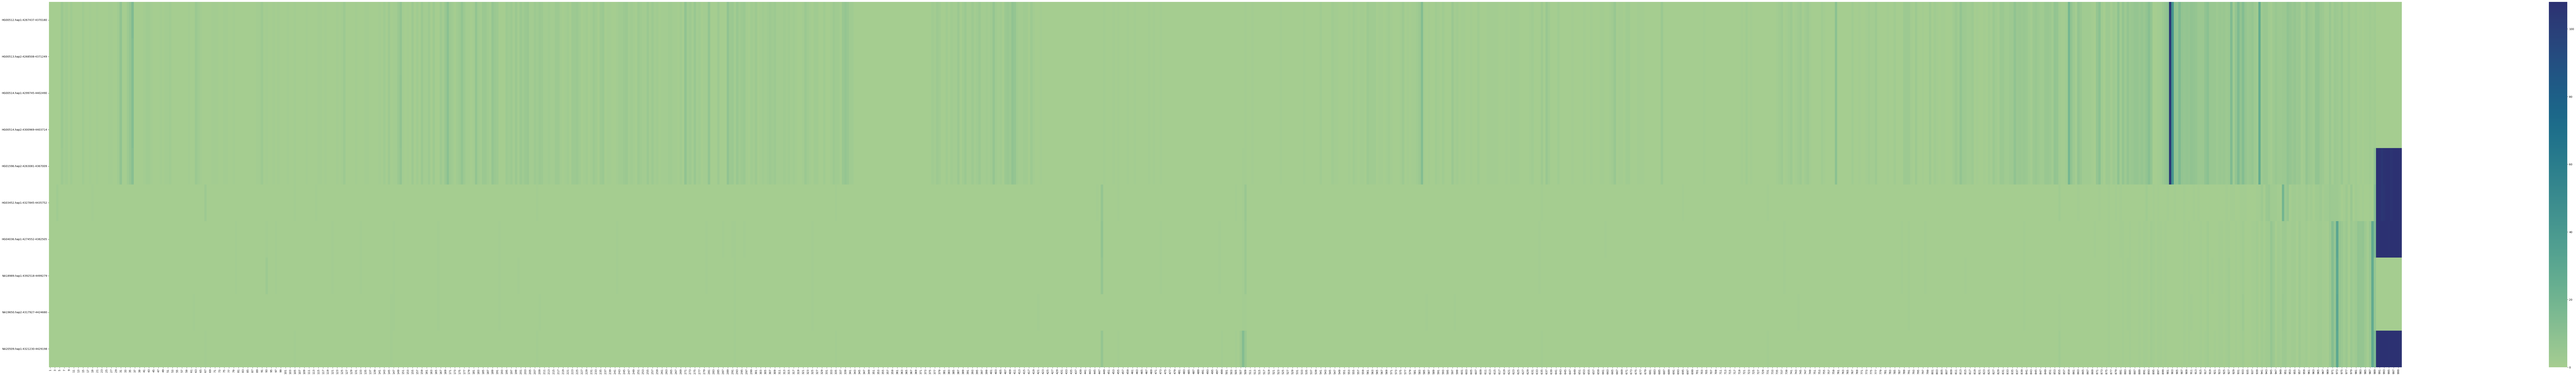

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(200,25))
sns.heatmap(heatHap.sort_index(), annot=False, cmap="crest", linecolor='black')
plt.savefig("/home/mark/Desktop/DR8.pdf", dpi=300)

In [ ]:
mutationList=[]
for column in df.columns:
    if len(set(df[column]))==1:
        
        mutationList.append([column, 0])
    else:
        
        consensusNucleotide = str(df.at['Consensus',column])
        
        variants=[]
        for row in df.index:
            if row == 'Consensus':
                continue
            else:
                
                if str(df.at[row,column]) == consensusNucleotide:
                    continue
                else:
                    if df.at[row,column] != '-':
                        variants.append(df.at[row,column])
                    else:
                        continue
                    
        mutationList.append([column, len(set(variants))])
mutationDF = pd.DataFrame(data=mutationList, columns=['Position','Mutations'])

In [ ]:

alt.data_transformers.disable_max_rows()
alt.Chart(mutationDF).mark_line().encode(
    x='Position',
    y='Mutations'
)

In [ ]:
alt.Chart(mutationDF).mark_line(interpolate='step-after').encode(
    x='Position',
    y='Mutations'
)

In [ ]:
mutationList=[]
for column in df.columns:
    if len(set(df[column]))==1:
        for row in df.index:
            if row =='Consensus':
                continue
            else:
                mutationList.append([column, 0, row])
    else:
        
        consensusNucleotide = str(df.at['Consensus',column])
        
        variants=[]
        for row in df.index:
            if row == 'Consensus':
                continue
            else:
                
                if str(df.at[row,column]) == consensusNucleotide:
                    mutationList.append([column, 0, row])
                else:
                    if df.at[row,column] != '-':
                        mutationList.append([column, 1, row])
                    else:
                        mutationList.append([column, 0, row])

In [ ]:
mutationDF = pd.DataFrame(data=mutationList, columns=['Position','Mutations','Haplotype'])

In [ ]:
mutationDF

In [ ]:
import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url
alt.data_transformers.disable_max_rows()

alt.Chart(mutationDF).mark_area().encode(
    alt.X('Position').axis(domain=False, tickSize=0),
    alt.Y('Mutations').stack('center').axis(None),
    alt.Color('Haplotype:N').scale(scheme='category20b')
).properties(
    width=10000,
    height=300
)

In [ ]:
mutationList=[]
for column in df.columns:
    if len(set(df[column]))==1:
        consensusNucleotide = str(df.at['Consensus',column])
        for row in df.index:
            if row =='Consensus':
                continue
            else:
                mutationList.append([column, consensusNucleotide, row])
    else:
        
        consensusNucleotide = str(df.at['Consensus',column])
        
        variants=[]
        for row in df.index:
            if row == 'Consensus':
                continue
            else:
                
                if str(df.at[row,column]) == consensusNucleotide:
                    mutationList.append([column, consensusNucleotide, row])
                else:
                    if df.at[row,column] != '-':
                        mutationList.append([column, str(df.at[row,column]), row])
                    else:
                        mutationList.append([column, consensusNucleotide, row])

In [ ]:
mutationDF = pd.DataFrame(data=mutationList, columns=['Position','Mutations','Haplotype'])

In [ ]:
mutationDF

In [ ]:
alt.Chart(mutationDF).mark_line().encode(
    x="Position:O", y="Mutations:O", color=alt.Color("Haplotype:N")
).properties(
    width=3000,
    height=300
)